In [541]:
import random as r
import pandas as pd
import numpy as np


n_samples = 10000


chars = '1234567890abcdefghijk'
user_id_len = 15
user_ids = set()
while len(user_ids) < n_samples:
    s = ''.join(r.choices(chars, k=user_id_len))
    user_ids.add(s)


max_order_num = 9
order_nums = []
for _ in range(1, n_samples + 1):
    order_nums.append(r.randint(1, max_order_num))


mean = 1440
std = 200
delivery_times = np.round(np.random.normal(mean, std, n_samples), 10)



lambda_ = 1
shift = 1
total_sums = np.round(np.random.exponential(lambda_, n_samples) + shift, 3)


retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention_numbers = [1, 2, 3, 4, 5]
retentions = np.random.choice(retention_numbers, n_samples, p=retention_probabilities)


data = pd.DataFrame({
    'user_id': list(user_ids),
    'order_num': order_nums,
    'delivery_time': delivery_times,
    'total_sum': total_sums,
    'retention': retentions
    })

data

,user_id,order_num,delivery_time,total_sum,retention
0,c912c35778e0j1c,6,1809.838632,1.625,1
1,kba7d2fiedhg2d6,3,1708.386586,1.526,4
2,2bg0420e2779975,2,1403.308571,1.752,2
3,0kfiggd1k71bab9,1,1459.606028,2.069,4
4,89gjh8924c7eaek,7,1486.278570,2.080,1
...,...,...,...,...,...
9995,19ih52k3abh71je,2,1560.016450,1.277,3
9996,jkkj9kgebag6ag8,3,1477.169345,1.721,1
9997,b044gk1g1i8jb1f,3,1557.965566,2.583,3
9998,5d782eecfgd1g21,8,1286.172066,1.728,1


In [542]:
mean_delivery_time_data = pd.DataFrame({'mean_delivery_time': np.round(data.groupby('order_num')['delivery_time'].mean())})
merged_data = pd.merge(data, mean_delivery_time_data, on='order_num')
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time
0,c912c35778e0j1c,6,1809.838632,1.625,1,1442.0
1,kba7d2fiedhg2d6,3,1708.386586,1.526,4,1438.0
2,2bg0420e2779975,2,1403.308571,1.752,2,1437.0
3,0kfiggd1k71bab9,1,1459.606028,2.069,4,1436.0
4,89gjh8924c7eaek,7,1486.278570,2.080,1,1453.0
...,...,...,...,...,...,...
9995,19ih52k3abh71je,2,1560.016450,1.277,3,1437.0
9996,jkkj9kgebag6ag8,3,1477.169345,1.721,1,1438.0
9997,b044gk1g1i8jb1f,3,1557.965566,2.583,3,1438.0
9998,5d782eecfgd1g21,8,1286.172066,1.728,1,1434.0


In [543]:
n_in_every_segment = 3
num_segments = (max_order_num + n_in_every_segment - 1) // n_in_every_segment
bins = [i * n_in_every_segment for i in range(num_segments + 1)]
labels = [f'{i * n_in_every_segment + 1}-{(i + 1) * n_in_every_segment}' for i in range(num_segments)]

merged_data['segment'] = pd.cut(merged_data['order_num'], bins=bins, labels=labels)
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,c912c35778e0j1c,6,1809.838632,1.625,1,1442.0,4-6
1,kba7d2fiedhg2d6,3,1708.386586,1.526,4,1438.0,1-3
2,2bg0420e2779975,2,1403.308571,1.752,2,1437.0,1-3
3,0kfiggd1k71bab9,1,1459.606028,2.069,4,1436.0,1-3
4,89gjh8924c7eaek,7,1486.278570,2.080,1,1453.0,7-9
...,...,...,...,...,...,...,...
9995,19ih52k3abh71je,2,1560.016450,1.277,3,1437.0,1-3
9996,jkkj9kgebag6ag8,3,1477.169345,1.721,1,1438.0,1-3
9997,b044gk1g1i8jb1f,3,1557.965566,2.583,3,1438.0,1-3
9998,5d782eecfgd1g21,8,1286.172066,1.728,1,1434.0,7-9


In [544]:
total_sum_desc = pd.DataFrame(merged_data['total_sum'].describe()).T
total_sum_desc

,count,mean,std,min,25%,50%,75%,max
total_sum,10000.0,2.009998,1.005798,1.0,1.289,1.699,2.403,11.264


In [545]:
most_frequent_total_sum = merged_data['total_sum'].value_counts()


print(f'Медиана: {total_sum_desc["50%"].values[0]}')
print(f'Мода: {most_frequent_total_sum.index[0]}; встречается {most_frequent_total_sum.iloc[0]} раз')
print(f'Среднее: {total_sum_desc["mean"].values[0]}')
print(f'Дисперсия: {np.var(merged_data["total_sum"])}')
print(f'Стандартное отклонение: {total_sum_desc["std"].values[0]}')

Медиана: 1.699
Мода: 1.035; встречается 17 раз
Среднее: 2.0099977999999994
Дисперсия: 1.01152901899516
Стандартное отклонение: 1.005798280975545


In [546]:
import matplotlib.pyplot as plt
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,c912c35778e0j1c,6,1809.838632,1.625,1,1442.0,4-6
1,kba7d2fiedhg2d6,3,1708.386586,1.526,4,1438.0,1-3
2,2bg0420e2779975,2,1403.308571,1.752,2,1437.0,1-3
3,0kfiggd1k71bab9,1,1459.606028,2.069,4,1436.0,1-3
4,89gjh8924c7eaek,7,1486.278570,2.080,1,1453.0,7-9
...,...,...,...,...,...,...,...
9995,19ih52k3abh71je,2,1560.016450,1.277,3,1437.0,1-3
9996,jkkj9kgebag6ag8,3,1477.169345,1.721,1,1438.0,1-3
9997,b044gk1g1i8jb1f,3,1557.965566,2.583,3,1438.0,1-3
9998,5d782eecfgd1g21,8,1286.172066,1.728,1,1434.0,7-9


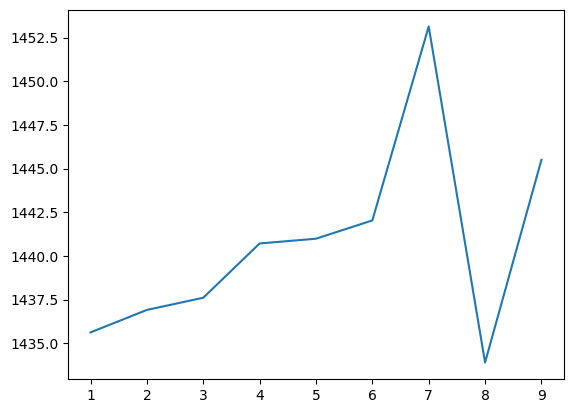

In [547]:
plt.plot(merged_data.groupby('order_num')['delivery_time'].mean())

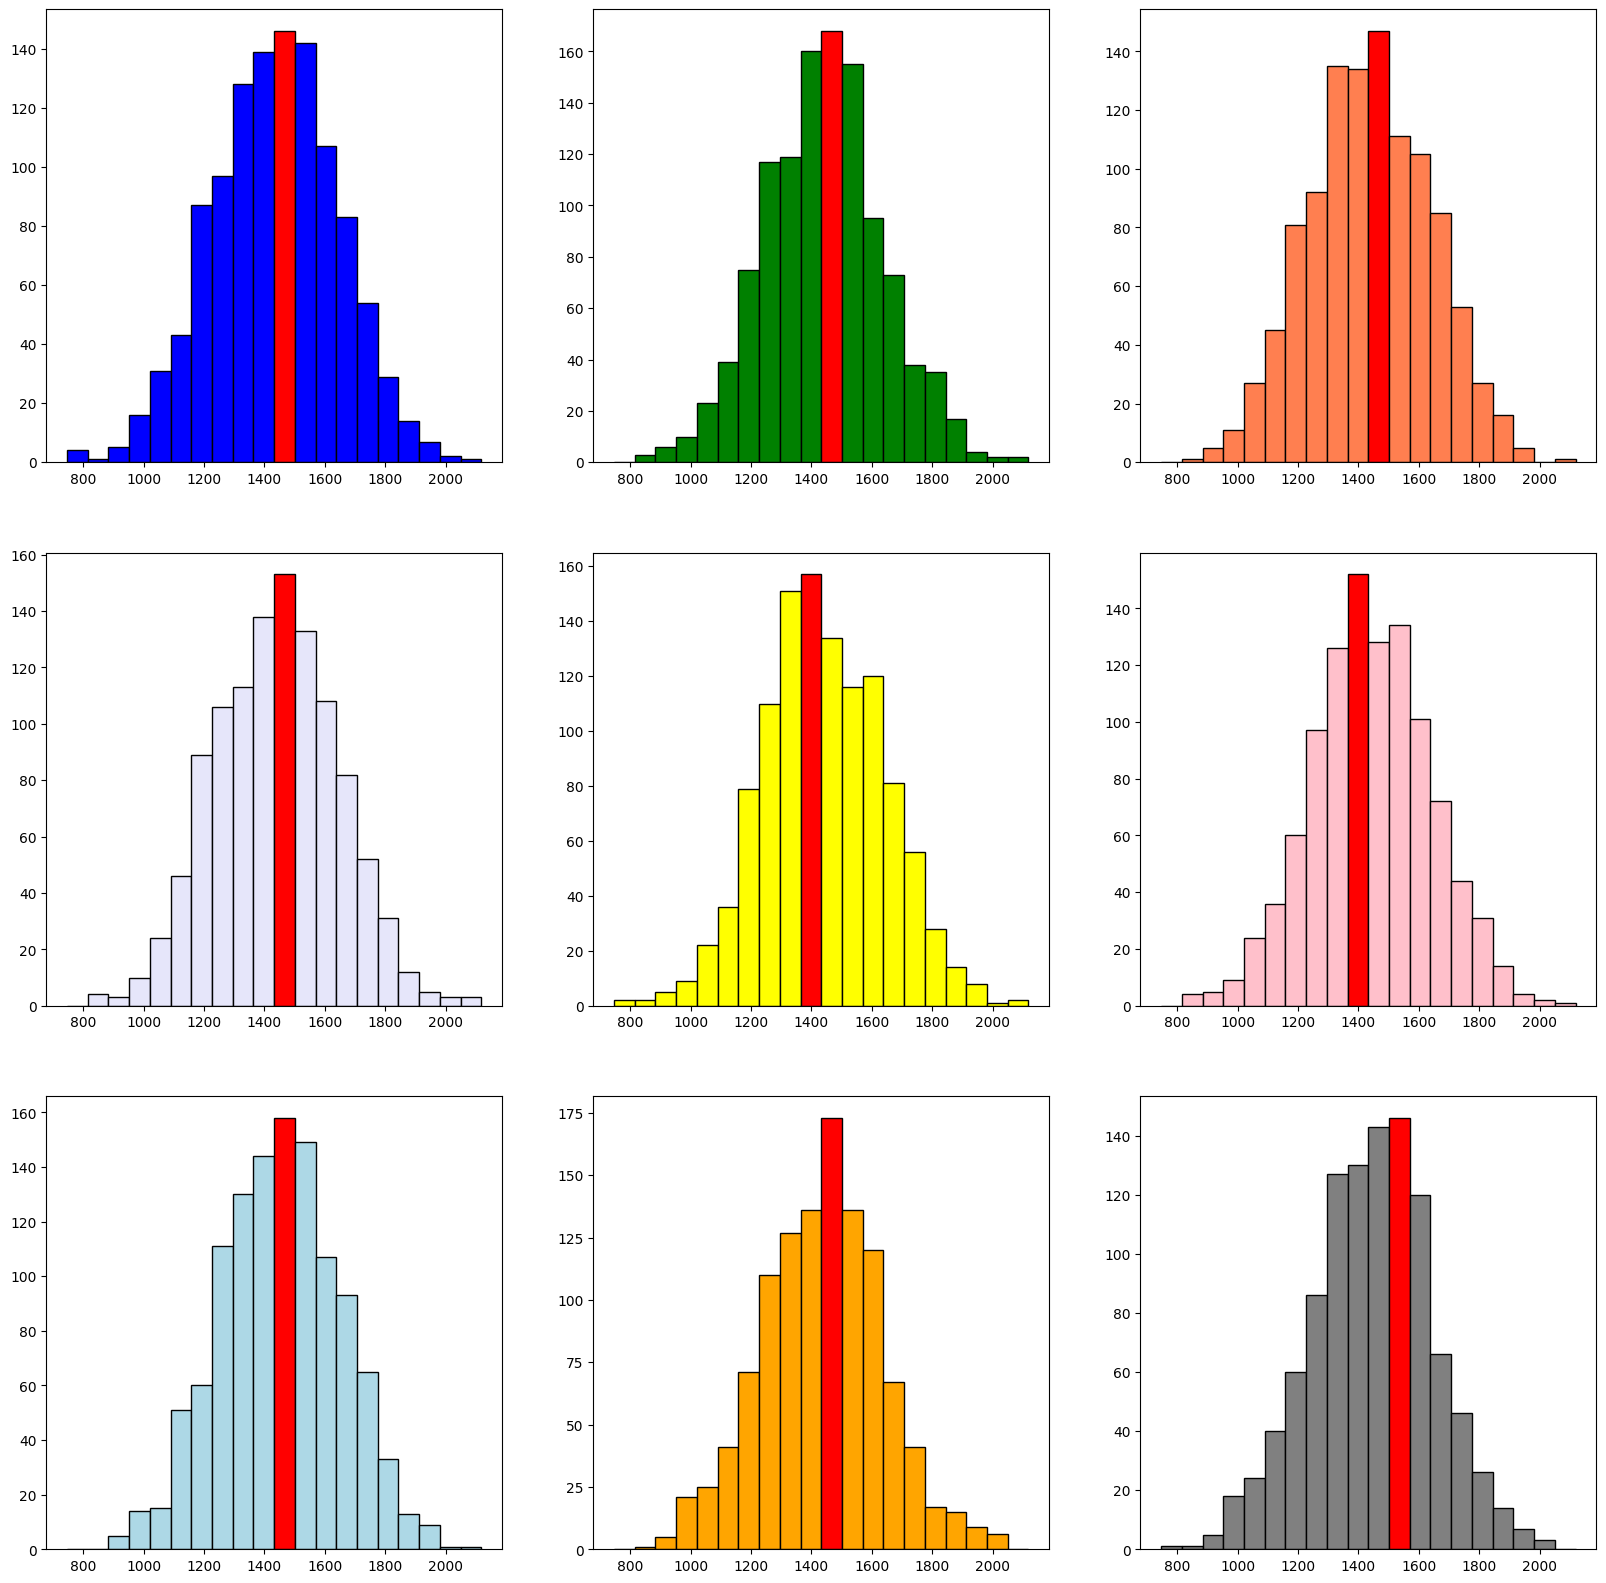

In [552]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
assert len(axs) * len(axs[0]) == max_order_num
curr_order_num = 0
bins = 20
colors = [
    "blue",
    "green",
    "coral",
    "lavender",
    "yellow",
    "pink",
    "lightblue",
    "orange",
    "gray"
]
for i in range(len(axs)):
    for j in range(len(axs[0])):
        curr_order_num += 1
        counts, bins, patches = axs[i, j].hist(merged_data[merged_data['order_num'] == curr_order_num]['delivery_time'], 
                       bins=bins, 
                       color=colors[curr_order_num - 1],
                       edgecolor='black'
                       )
        max_index = np.argmax(counts)
        patches[max_index].set_facecolor('red')
        #axs[i, j].title(f'Номер заказа {curr_order_num}')